<a href="https://colab.research.google.com/github/andreaseliass/analise-jogos-pc/blob/main/Atividade_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset em análise é de jogos de computador e está em https://www.kaggle.com/datasets/khaiid/most-selling-pc-games



In [91]:
#Fazendo importações
import numpy as np 
import pandas as pd 

#Carregando o dataset
data = pd.read_csv("/content/drive/MyDrive/Grupo DS/Semana 3/Games.csv")
data.info

<bound method DataFrame.info of                                      Name  Sales          Series  Release  \
0           PlayerUnknown's Battlegrounds   42.0             NaN     2017   
1                               Minecraft   33.0       Minecraft     2011   
2                              Diablo III   20.0          Diablo     2012   
3                             Garry's Mod   20.0             NaN     2006   
4                                Terraria   17.2             NaN     2011   
..                                    ...    ...             ...      ...   
170                              Vietcong    1.0        Vietcong     2003   
171    Warhammer Online: Age of Reckoning    1.0       Warhammer     2008   
172        Who Wants to Be a Millionaire?    1.0             NaN     1999   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander     1994   
174                            Zoo Tycoon    1.0      Zoo Tycoon     2001   

                       Genre               

A seguir vamos retirar todas as linhas que contém valores Nan, ou seja, nulos.



In [92]:
data.dropna(how='any', inplace=True)
data.reset_index(drop=True, inplace=True)

Abaixo podemos ver que foram retiradas 36 linhas que tinham valores nulos (NaN)

In [93]:
data.info

<bound method DataFrame.info of                                      Name  Sales          Series  Release  \
0                               Minecraft   33.0       Minecraft     2011   
1                              Diablo III   20.0          Diablo     2012   
2                       World of Warcraft   14.0        Warcraft     2004   
3                             Half-Life 2   12.0       Half-Life     2004   
4                The Witcher 3: Wild Hunt   12.0     The Witcher     2015   
..                                    ...    ...             ...      ...   
134                     Unreal Tournament    1.0          Unreal     1999   
135                              Vietcong    1.0        Vietcong     2003   
136    Warhammer Online: Age of Reckoning    1.0       Warhammer     2008   
137  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander     1994   
138                            Zoo Tycoon    1.0      Zoo Tycoon     2001   

                       Genre               

A seguir converte-se os valores de Release (ano de lançamento) que são do tipo float no tipo int. 

Logo depois usa-se data.head para mostrar as primeiras linhas do dataset.


In [94]:
#Lets start with dropping nan values
data.Release = data.Release.astype(int)
data.head()     # head method always gives you overview of data.

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,Minecraft,33.0,Minecraft,2011,"Sandbox, survival",Mojang Studios,Mojang Studios
1,Diablo III,20.0,Diablo,2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
2,World of Warcraft,14.0,Warcraft,2004,MMORPG,Blizzard Entertainment,Blizzard Entertainment
3,Half-Life 2,12.0,Half-Life,2004,First-person shooter,Valve,Valve (digital)
4,The Witcher 3: Wild Hunt,12.0,The Witcher,2015,Action role-playing,CD Projekt Red,CD Projekt


In [95]:
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

import os


A seguir se mostra o número de linhas e o número de colunas do dataset.

In [96]:
data.shape

(139, 7)

A função ".describe" é utilizada pra se obter algumas informações sobre os dados do dataset, um resumo das estatísticas. Retorna valores de contagem, média, desvio padrão, percentis (25%, 50% e 75%), valores mínimos e valores máximos

In [97]:
data.describe()


,Sales,Release
count,139.000000,139.000000
mean,2.831655,2003.251799
std,3.884399,7.659505
min,1.000000,1984.000000
25%,1.000000,1998.000000
50%,2.000000,2003.000000
75%,3.000000,2009.000000
max,33.000000,2020.000000


A seguir fazemos o seguinte pra saber se existem valores faltando. Espera-se que não existam valores faltantes, pois anteriormente fez-se a retiradas de linhas com valores nulos.


In [98]:
data.isnull().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

Faz-se a pergunta: Qual gênero de jogo de computador foi mais feito? Usa-se a função que conta a quantidade de valores por preditor de determinada coluna.

In [99]:
data['Genre'].value_counts()


Real-time strategy                            23
First-person shooter                          18
Action role-playing                           11
Role-playing game                              7
MMORPG                                         6
Construction and management simulation         5
City-building                                  5
Turn-based strategy, 4X                        4
Action-adventure                               4
Action                                         3
Grand strategy                                 3
Life simulation                                3
God game                                       3
Third-person shooter, survival horror          3
City-building game                             2
Fighting                                       2
Interactive movie                              2
Business simulation                            2
Visual novel, adventure                        2
Adventure                                      2
Tactical shooter    

Como se pode ver, o gênero de jogos mais fabricado é de estratégia em tempo real. A seguir um gráfico mostrando os jogos por quantidade de jogos por gênero.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

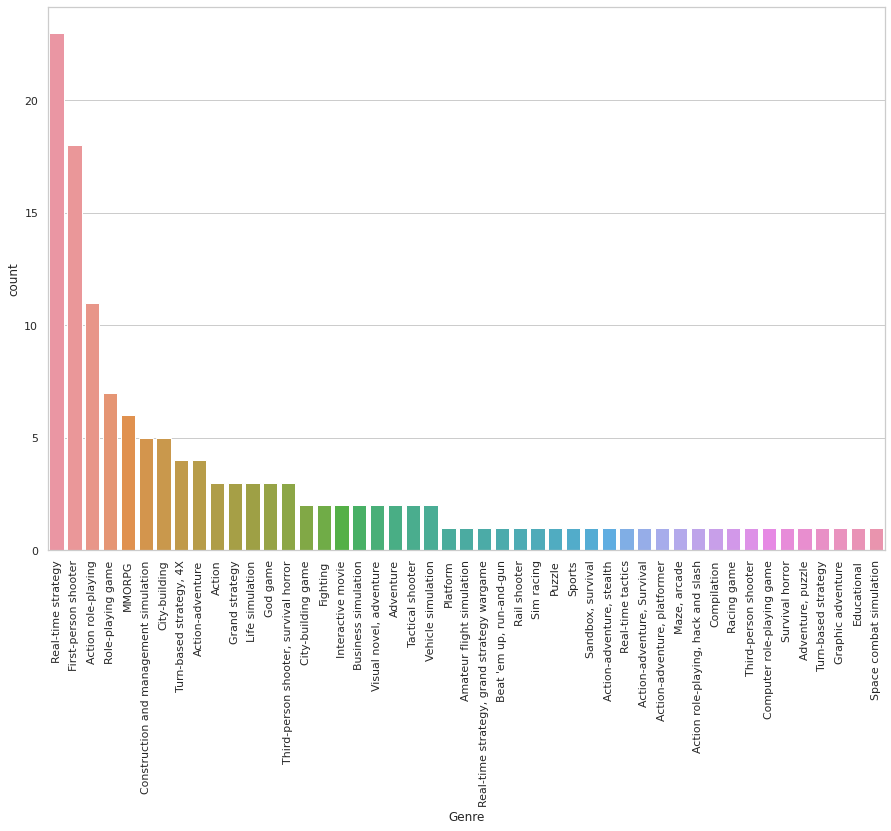

In [100]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Qual ano teve mais lançamento de jogos de computador?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

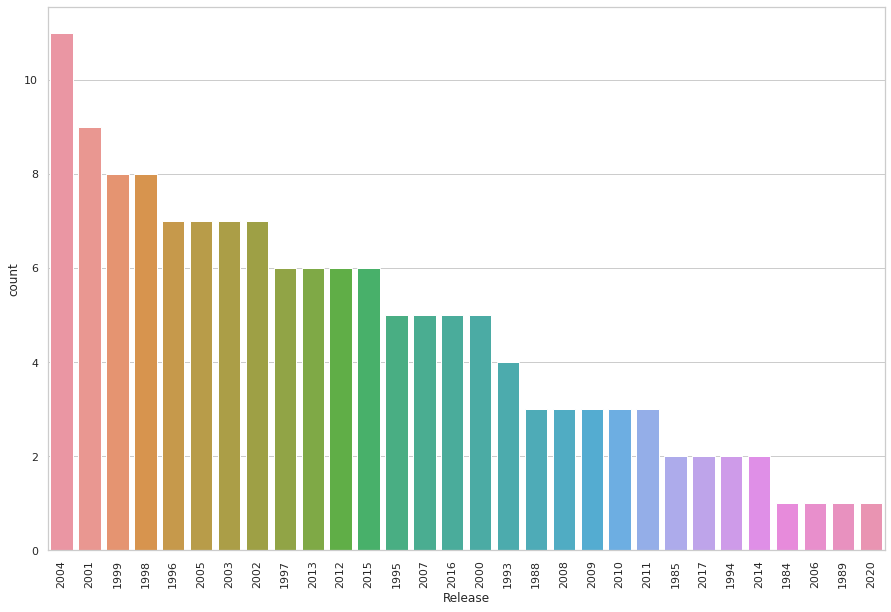

In [101]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Release", data=data, order = data.groupby(by=['Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Pode-se observar pelo gráfico que o ano que teve mais lançamento de jogos de computador foi o ano de 2004, seguido pelos anos de 2001, 1999, 1998 e 1996.


Quais os gêneros mais feitos nesses 5 anos em que foram feitos mais jogos?

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

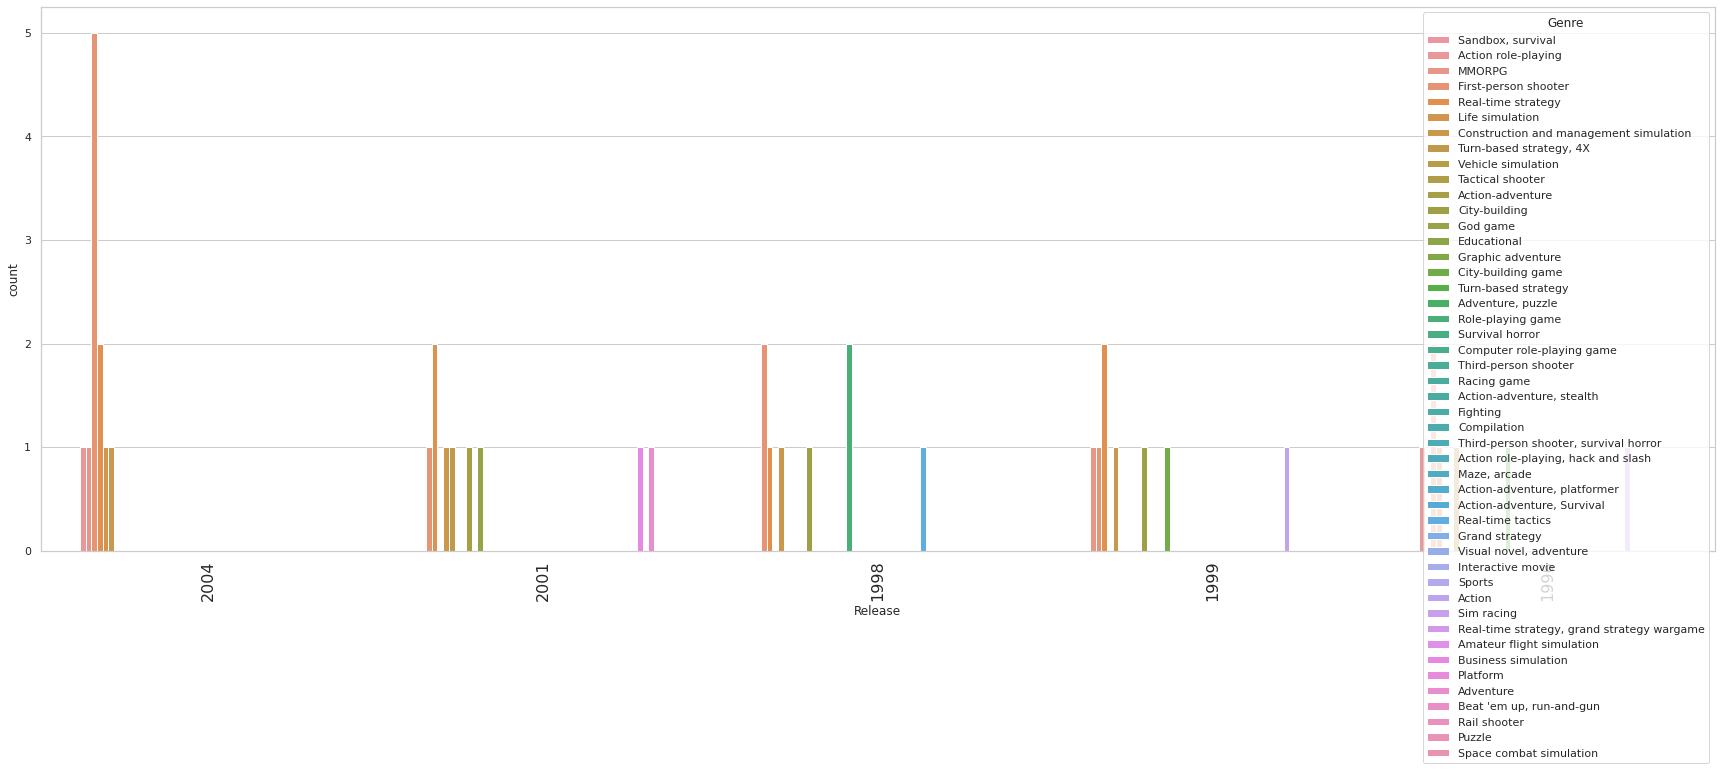

In [102]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Release", data=data, hue='Genre', order=data.Release.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Qual ano teve mais vendas?

In [103]:
data_year = data.groupby(by=['Release'])['Sales'].sum()
data_year = data_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

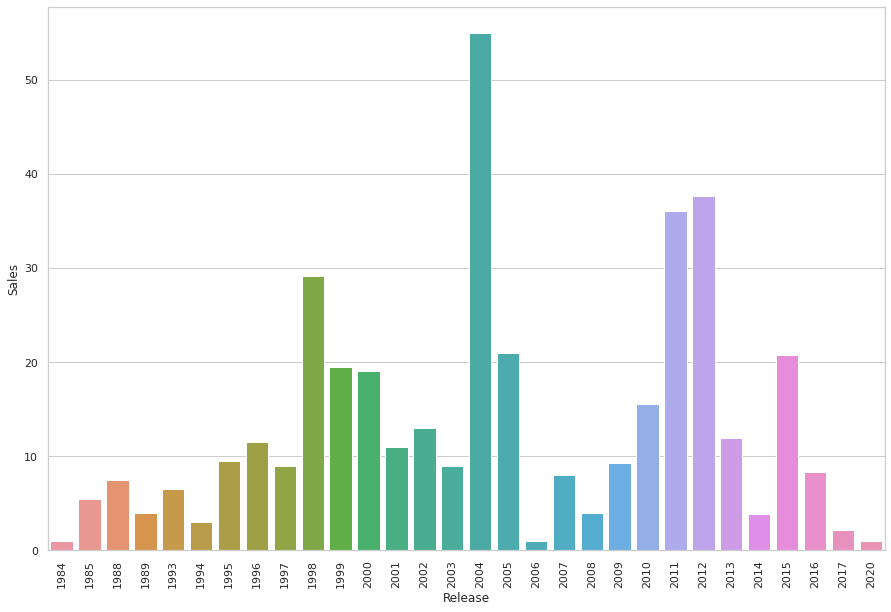

In [104]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Release", y="Sales", data=data_year)
plt.xticks(rotation=90)

Como se pode observar no gráfico acima, o ano que teve mais vendas de jogos foi o de 2004 (que também foi o ano que se teve maior número de jogos fabricados). No entanto, o ano com o segundo maior número de vendas foi o de 2012, diferente do ano que teve o 2º maior número de jogos fabricados, que foi o ano de 2001.

Faz-se uma nova pergunta: Qual gênero de jogo foi mais lançado em um único ano?

In [105]:
year_max_df = data.groupby(['Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Release", "count"], keep='last').reset_index(drop=True)

In [106]:
genre = year_max_genre['Genre'].values

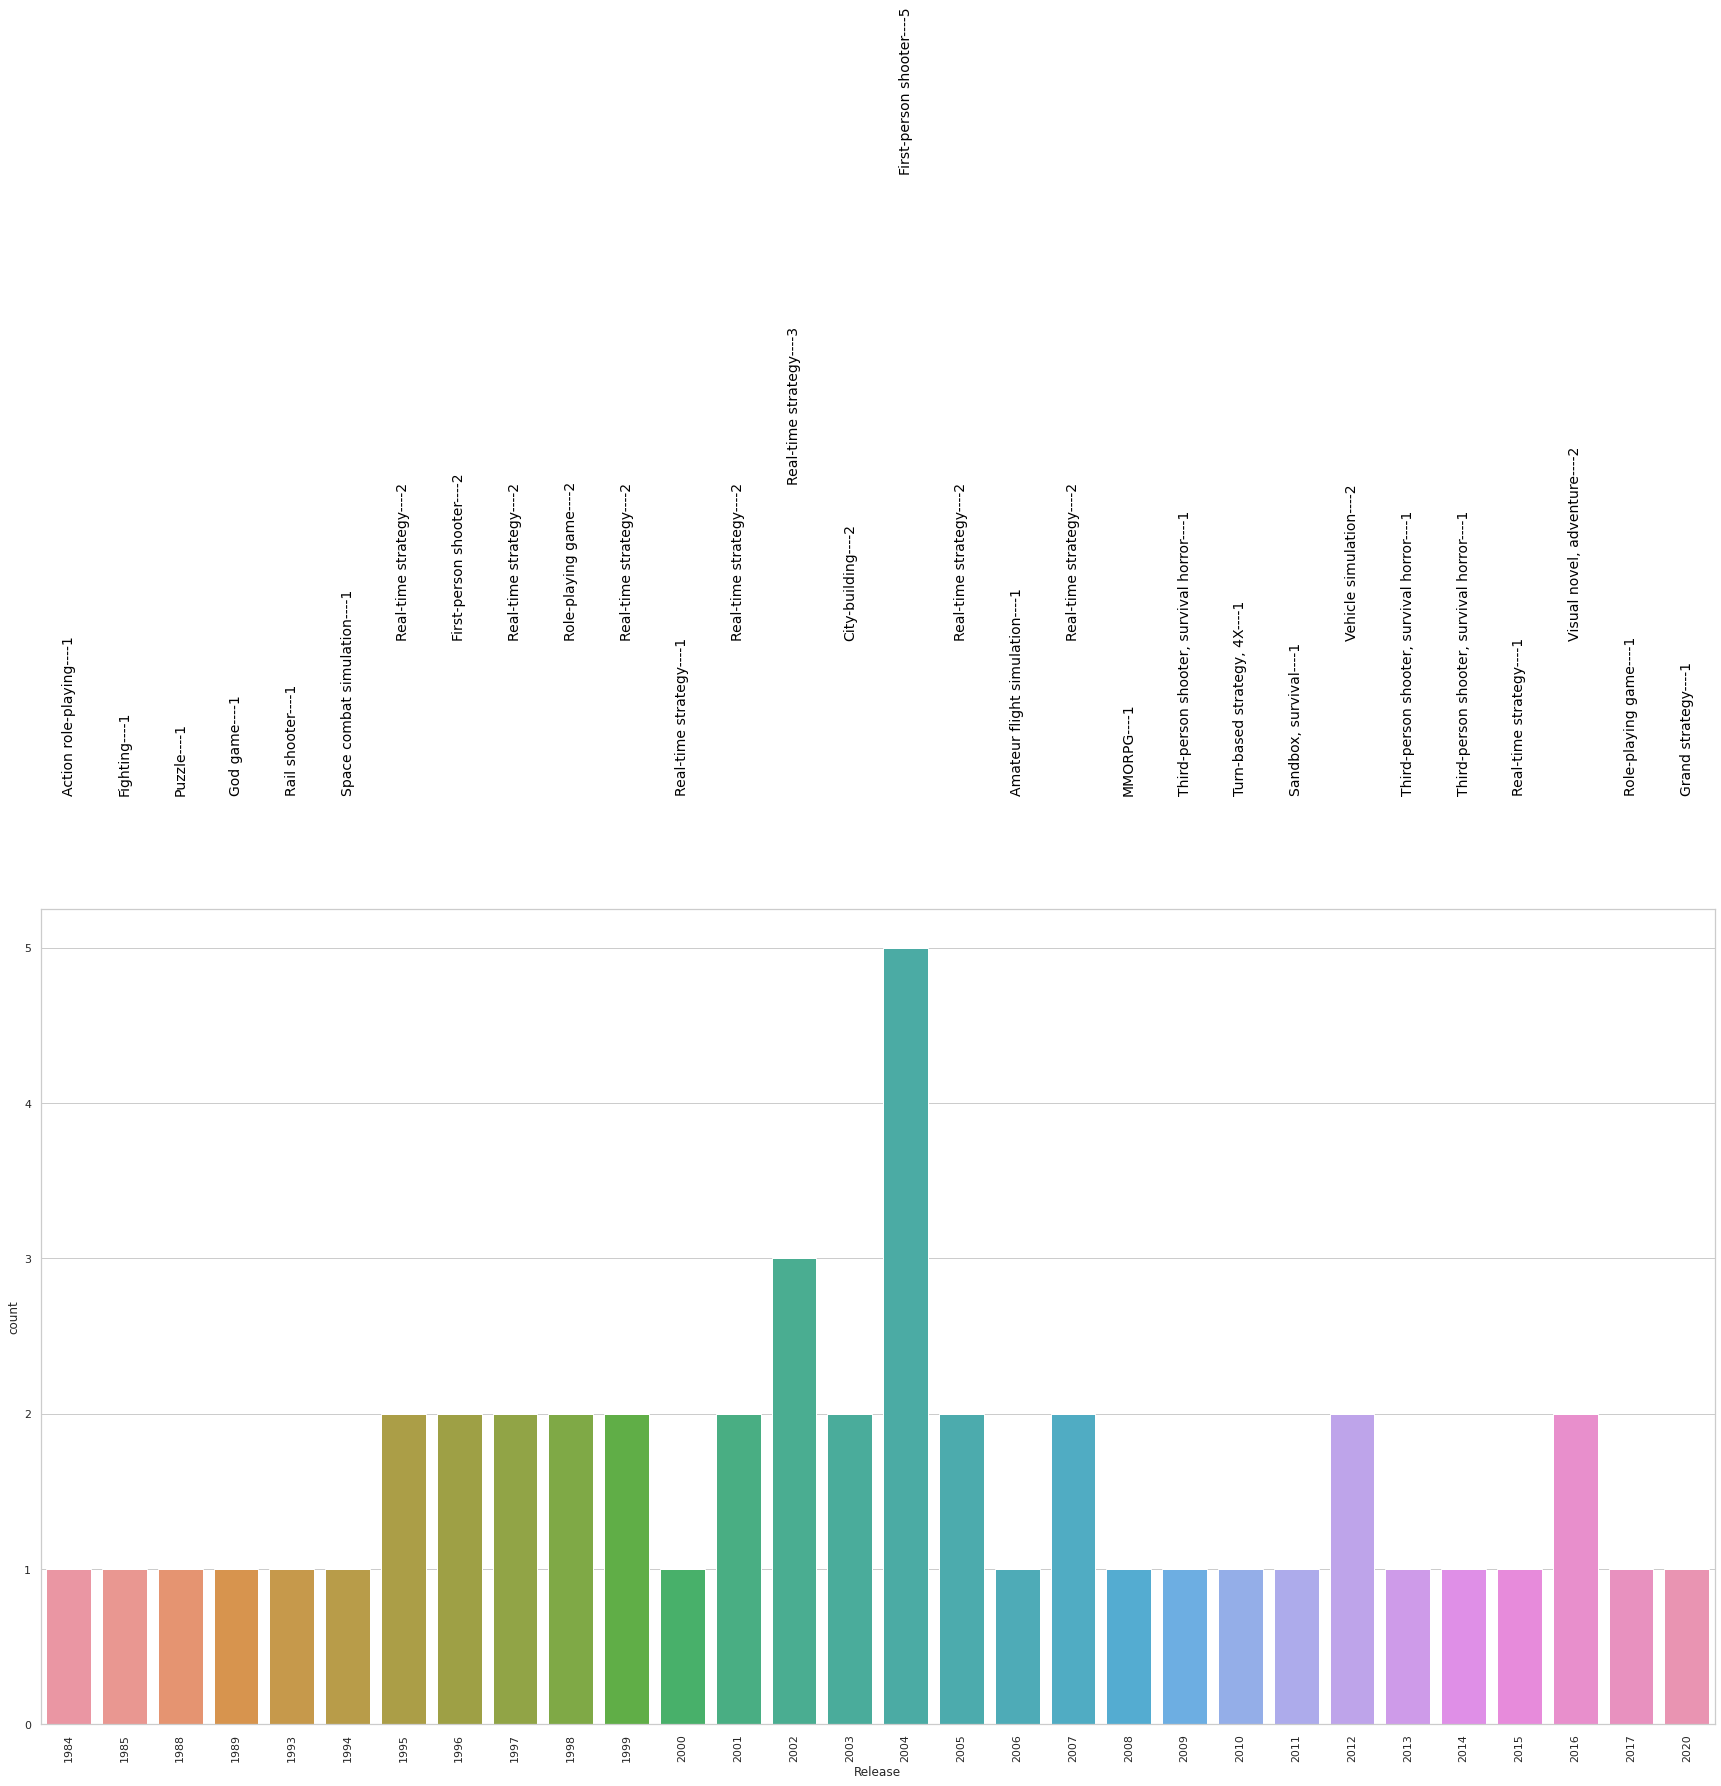

In [107]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:

    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()


No gráfico pode-se observar qual o gênero mais lançado em cada ano. Em 2014 foi o de gênero "atirador em primeira pessoa".

Qual gênero de jogo de computador vendeu mais em cada ano?

In [108]:
year_sale_dx = data.groupby(by=['Release', 'Genre'])['Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Release'])['Sales'].transform(max) == year_sale_dx['Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [109]:
genre = year_sale_max['Genre']

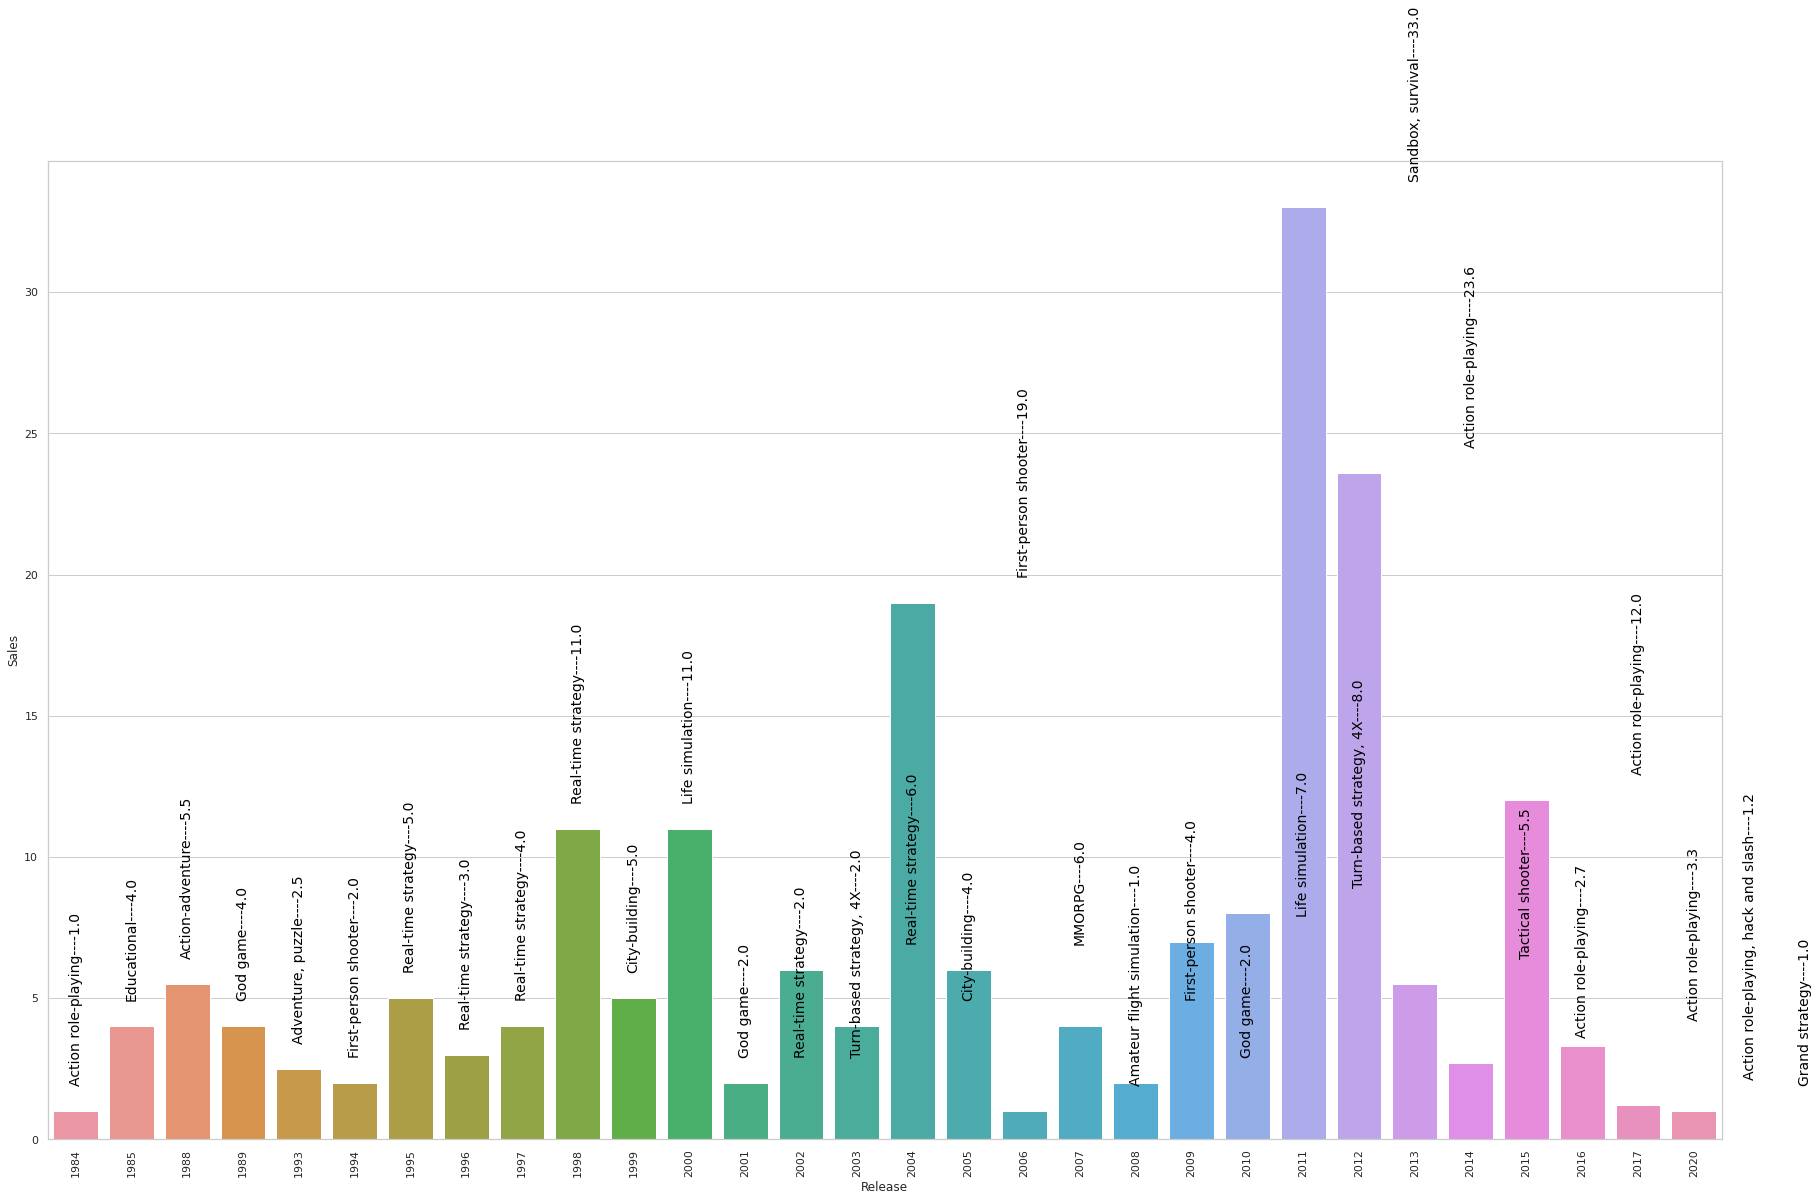

In [110]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Release', y='Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()


Qual gênero de jogo tem o valor de venda mais alto?

In [111]:
data_genre = data.groupby(by=['Genre'])['Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

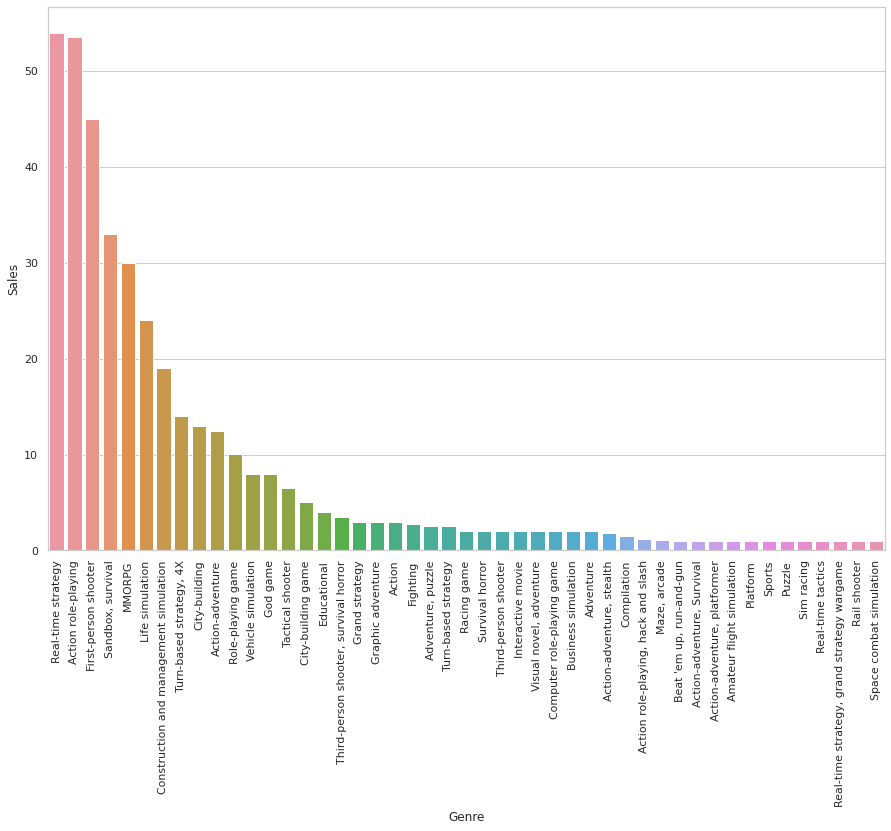

In [112]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Sales", data=data_genre)
plt.xticks(rotation=90)

O jogo que tem o valor de venda mais alto é o de estratégia em tempo real.

Mais uma pergunta: Qual o desenvolvedor tem o maior valor de venda globalmente?

In [113]:
data_platform = data.groupby(by=['Developer'])['Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

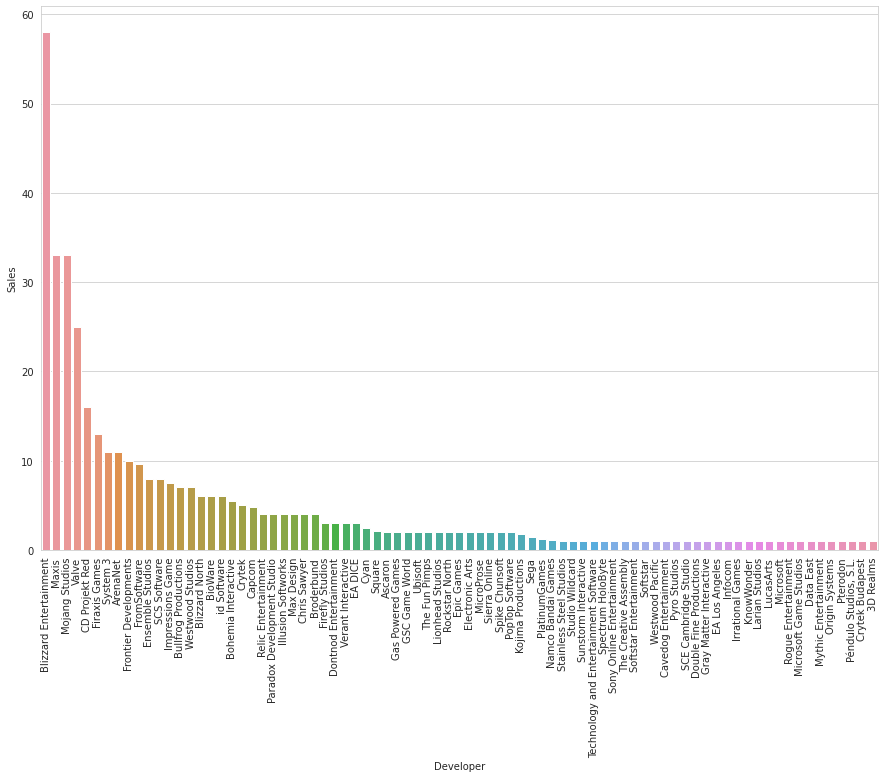

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Developer", y="Sales", data=data_platform)
plt.xticks(rotation=90)

Pelo gráfico, podemos ver que o desenvolvedor Blizzard Entertainment está bem na frente de todos os outros.

Qual jogo de computador tem o maior valor de venda globalmente?

In [114]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Release', 'Genre', 'Sales']]
top_game_sale = top_game_sale.sort_values(by=['Sales'], ascending=False)

In [115]:
name = top_game_sale['Name']
release = top_game_sale['Release']
y = np.arange(0, 20)

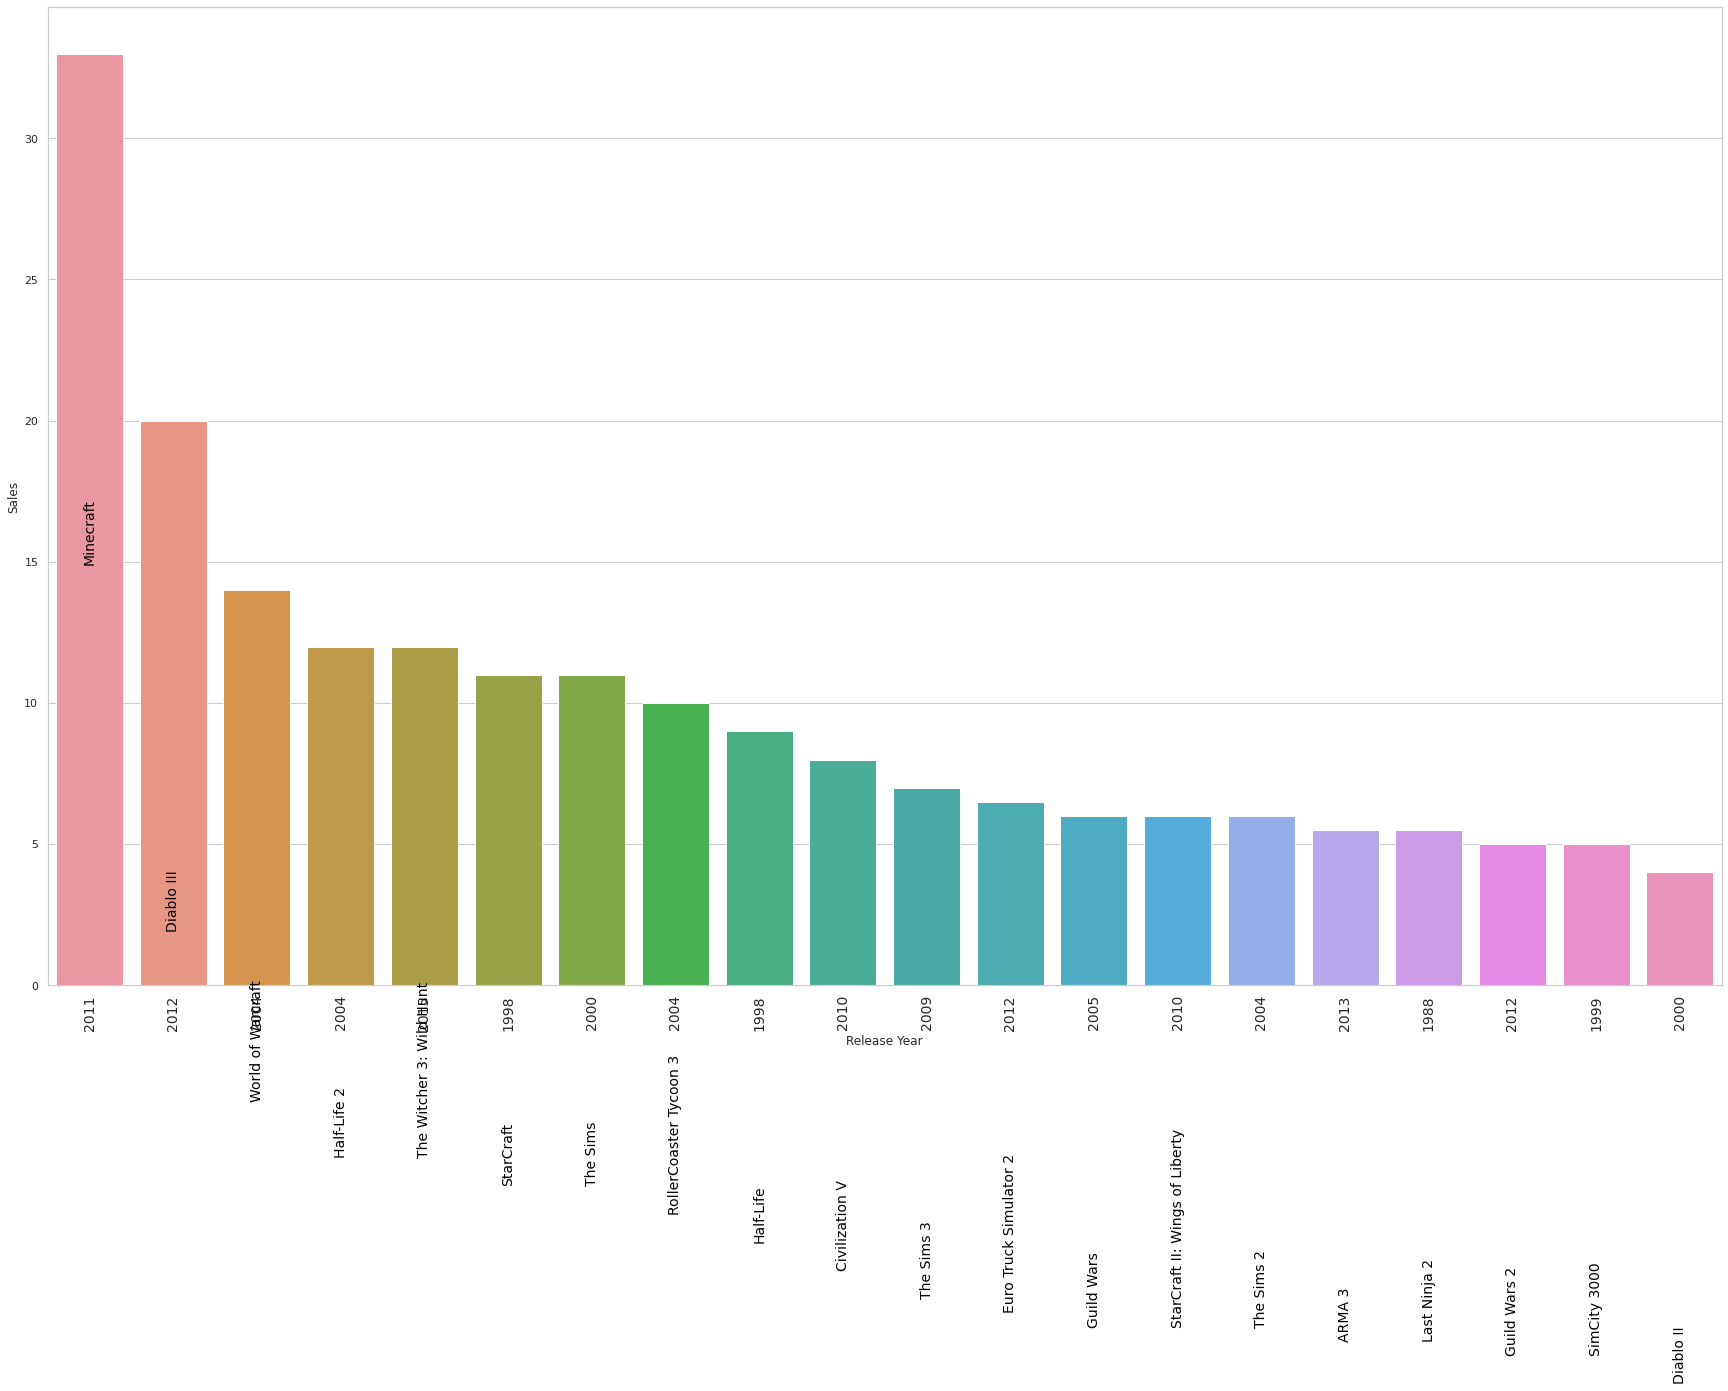

In [116]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Sales', data=top_game_sale)
index = 0

for value in top_game_sale['Sales']:
  g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
  index += 1

plt.xticks(y, top_game_sale['Release'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()


Podemos ver no gráfico que o jogo de computador que tem o maior valor de venda de forma global é Minecraft.

Abaixo mostraremos um mapa mostrando as vendas por gênero de jogo de computador:

In [117]:
comp_genre = data[['Genre', 'Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

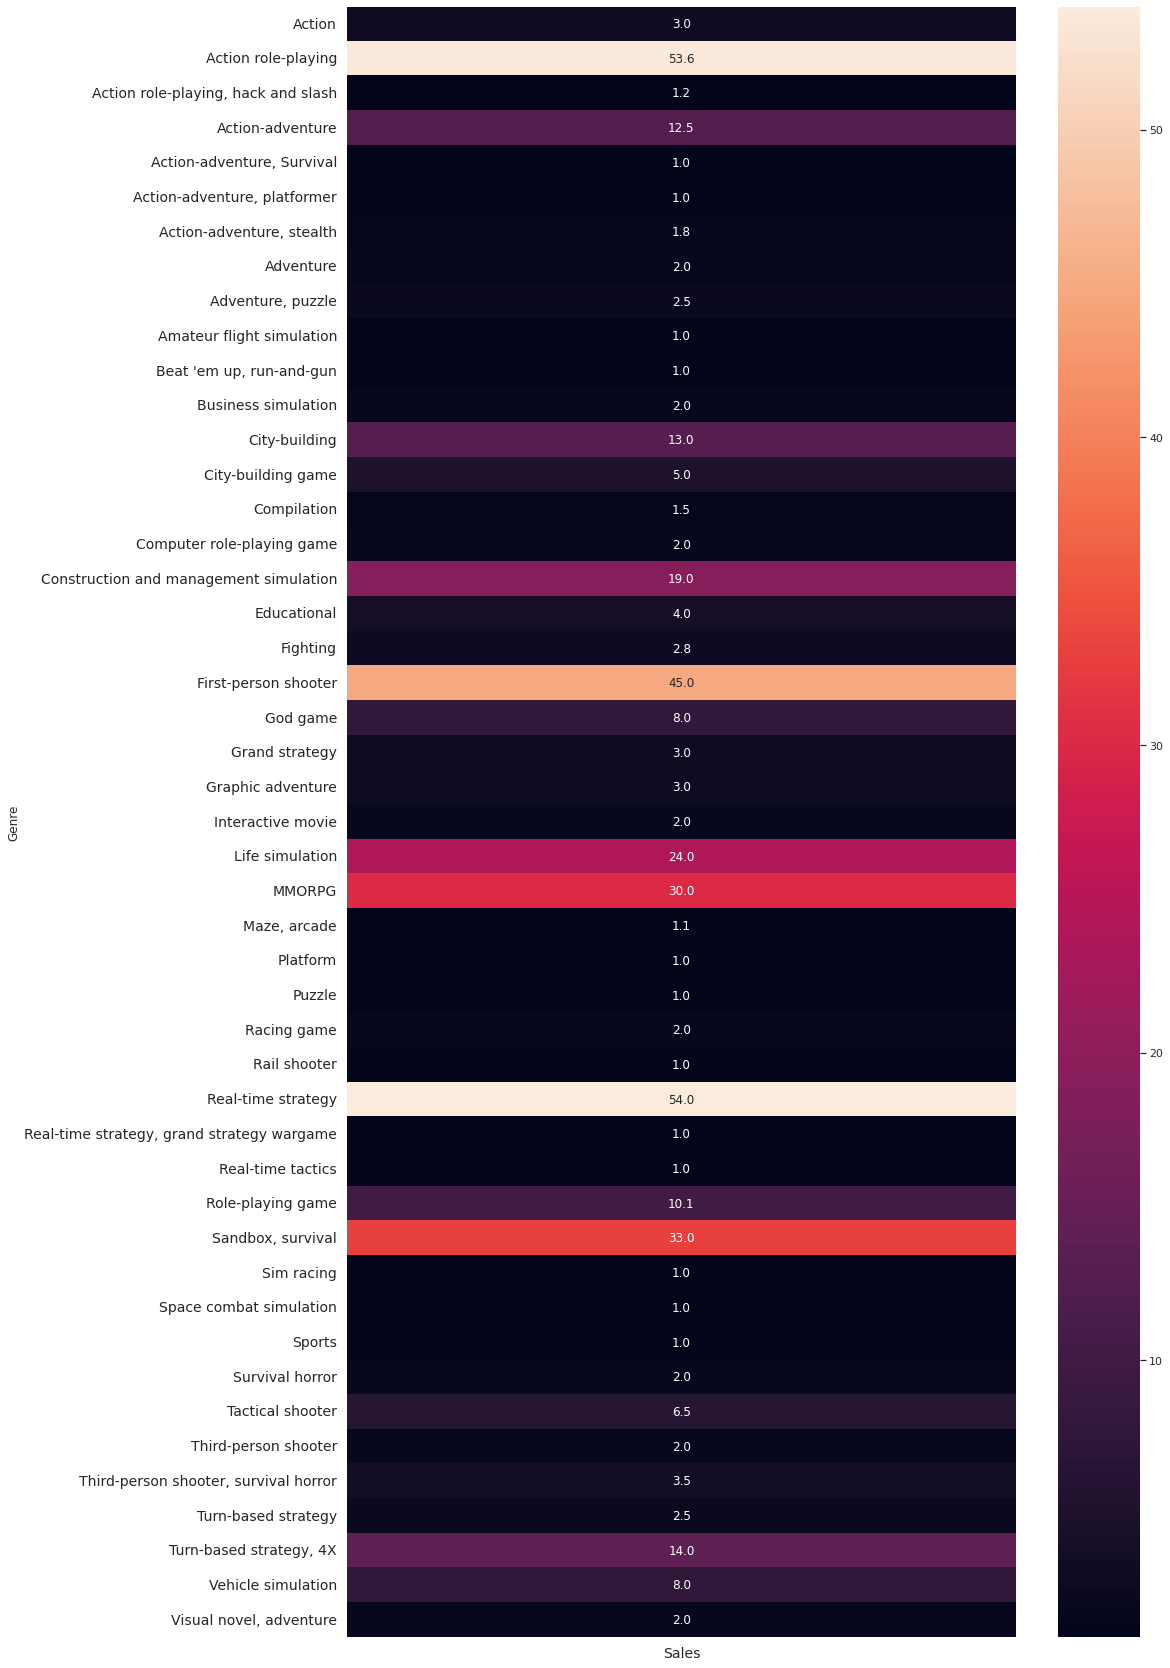

In [118]:
plt.figure(figsize=(15, 30))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Abaixo tem-se uma tabela com os 50 primeiros valores do dataset das vendas por gênero:

In [121]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['Sales'], value_name='Sales')
comp_table.head(50)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Genre,variable,Sales
0,Action,Sales,3.0
1,Action role-playing,Sales,53.6
2,"Action role-playing, hack and slash",Sales,1.2
3,Action-adventure,Sales,12.5
4,"Action-adventure, Survival",Sales,1.0
5,"Action-adventure, platformer",Sales,1.0
6,"Action-adventure, stealth",Sales,1.8
7,Adventure,Sales,2.0
8,"Adventure, puzzle",Sales,2.5
9,Amateur flight simulation,Sales,1.0


Gráfico de barras com o valor de vendas por gênero:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

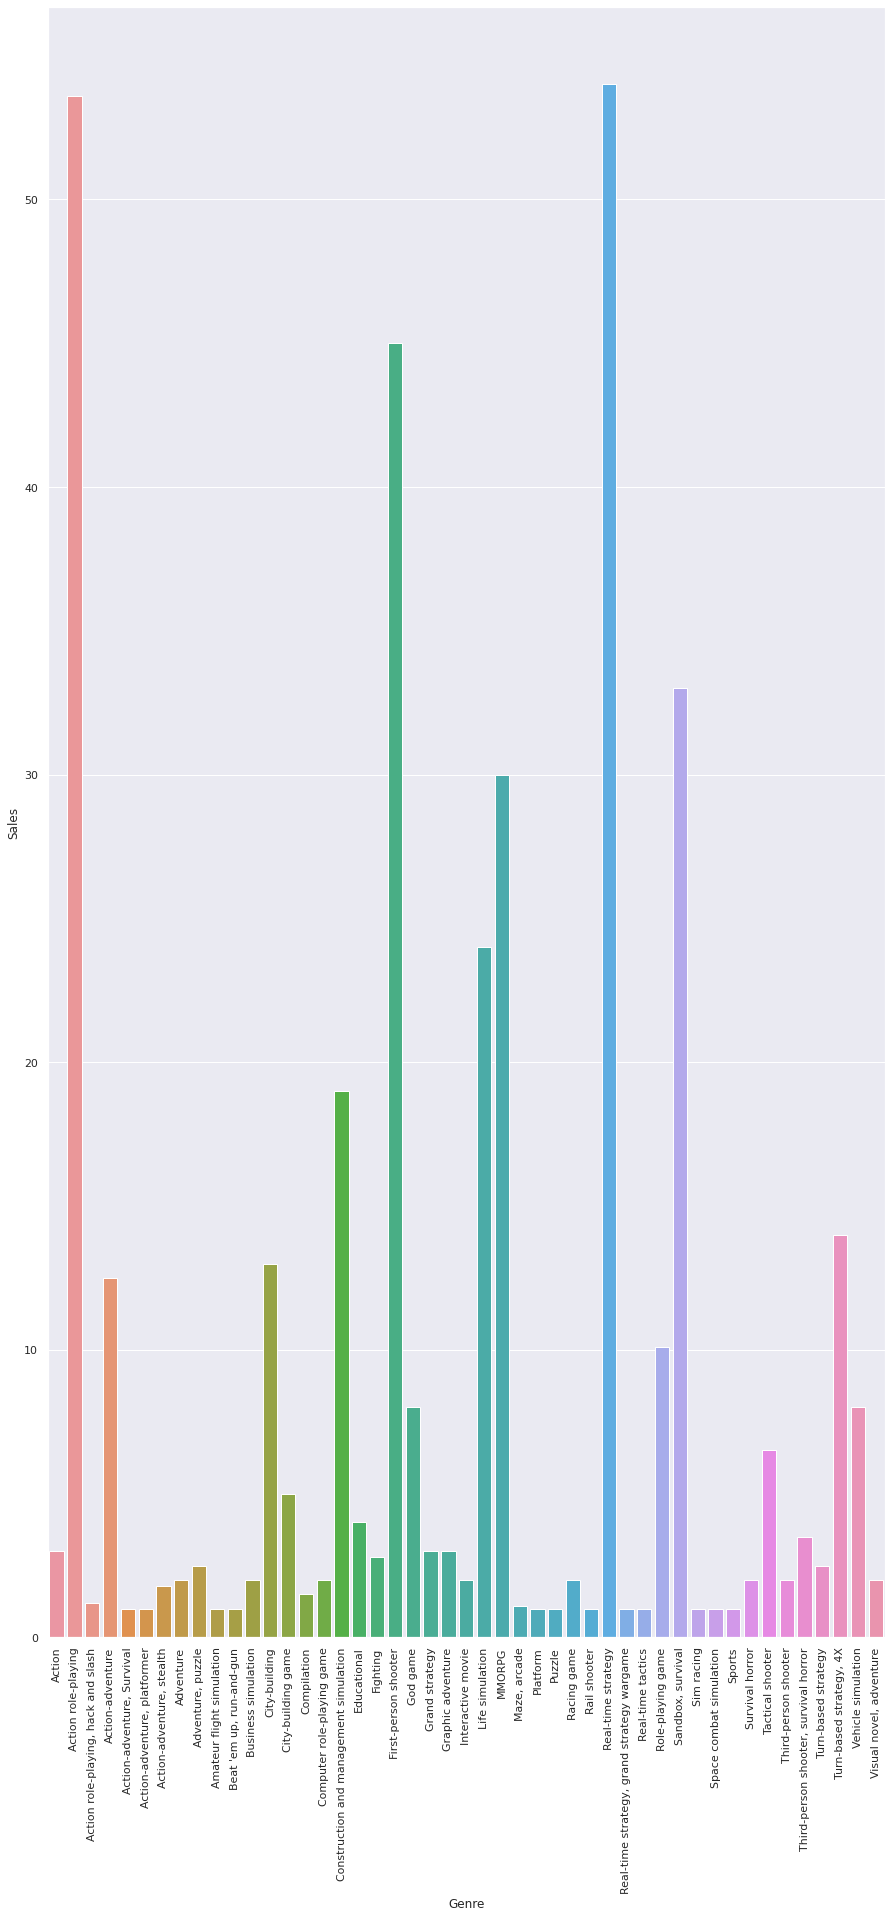

In [122]:
plt.figure(figsize=(15, 30))
sns.barplot(x='Genre', y='Sales', data=comp_table)
plt.xticks(rotation=90)

Comparação de vendas por desenvolvedor, 10 primeiros valores da tabela:

In [123]:
comp_platform = data[['Developer', 'Sales']]
comp_platform.head(10)

,Developer,Sales
0,Mojang Studios,33.0
1,Blizzard Entertainment,20.0
2,Blizzard Entertainment,14.0
3,Valve,12.0
4,CD Projekt Red,12.0
5,Blizzard Entertainment,11.0
6,Maxis,11.0
7,Frontier Developments,10.0
8,Valve,9.0
9,Firaxis Games,8.0


Top 20 editoras de jogos (com mais vendas):

In [124]:
top_publisher = data.groupby(by=['Publisher'])['Release'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

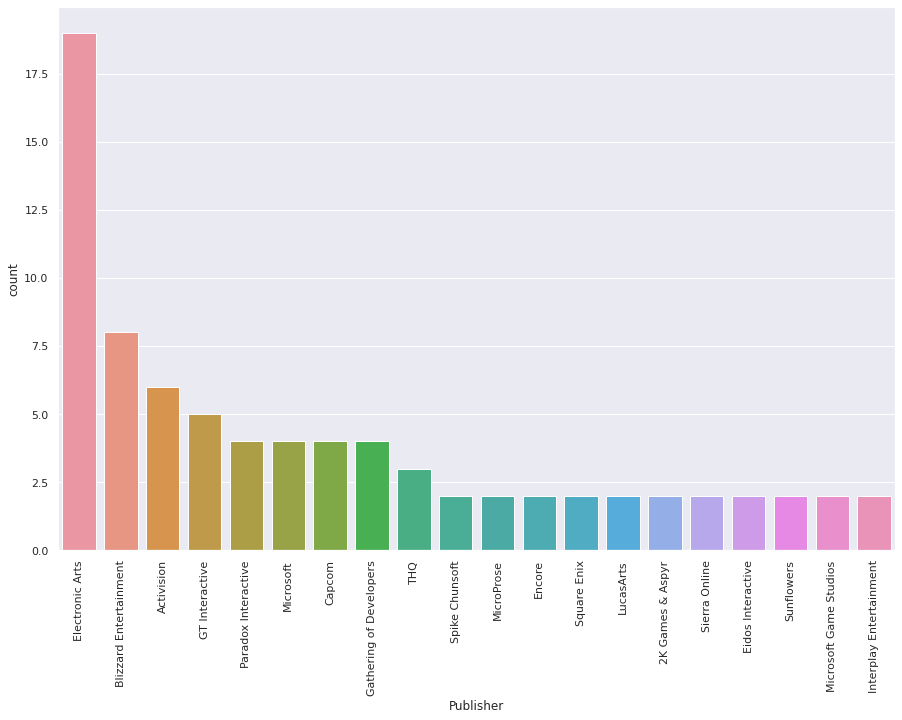

In [125]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Release'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

Histograma de Vendas:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


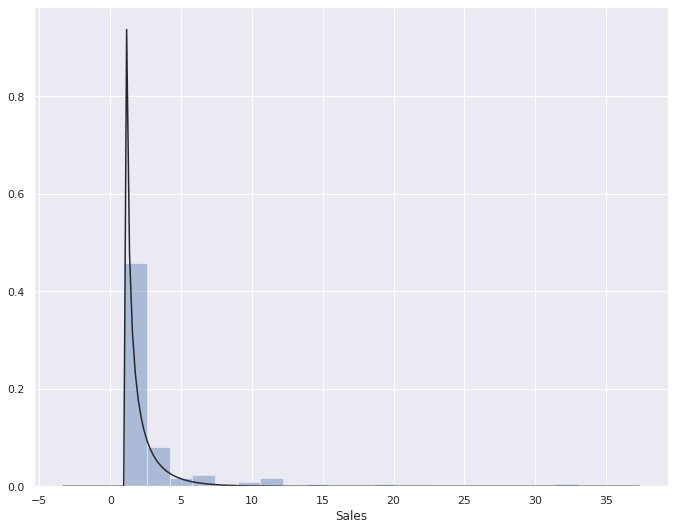

In [126]:
plt.figure(figsize=(25,30))
sales_columns = ['Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

Distribuição após a transformação logaritmica:

In [127]:
data_hist_log = data.copy()

In [128]:
data_hist_log = data_hist_log[data_hist_log.Sales != 0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


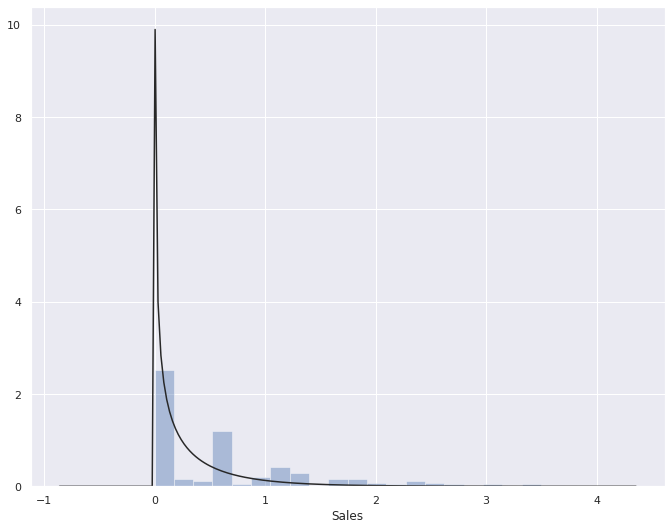

In [129]:
plt.figure(figsize=(25,30))
sales_columns = ['Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


Relação entre as colunas:

O heatmap é uma ótima forma de entender correlação:

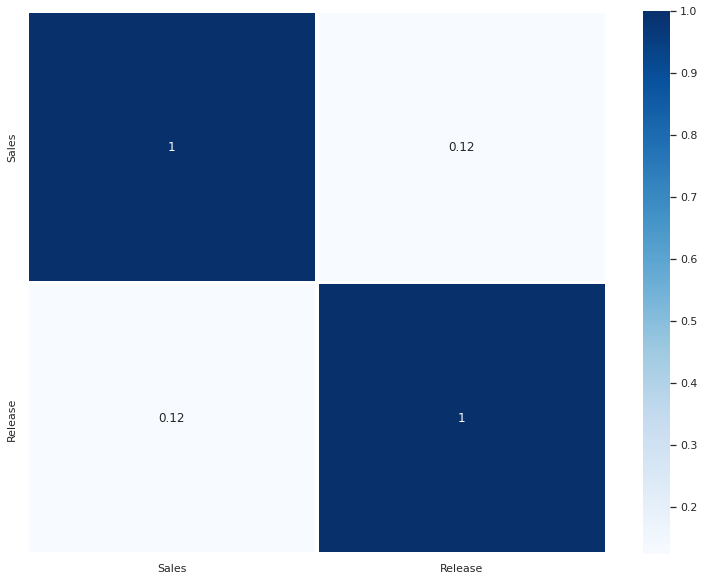

In [130]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

Do heatmap podemos concluir que não há grande correlação entre os anos de lançamento e as vendas (2 únicos preditores que têm valor numérico).

Aqui finda a análise do dataset de jogos de computador.